In [1]:
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn

In [2]:
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
climate = pd.read_csv("C:/Users/kesdr/Downloads/climate_change_dataset.csv")

In [4]:
print(climate.head())

   Year    Country  Avg Temperature (°C)  CO2 Emissions (Tons/Capita)  \
0  2006         UK                   8.9                          9.3   
1  2019        USA                  31.0                          4.8   
2  2014     France                  33.9                          2.8   
3  2010  Argentina                   5.9                          1.8   
4  2007    Germany                  26.9                          5.6   

   Sea Level Rise (mm)  Rainfall (mm)  Population  Renewable Energy (%)  \
0                  3.1           1441   530911230                  20.4   
1                  4.2           2407   107364344                  49.2   
2                  2.2           1241   441101758                  33.3   
3                  3.2           1892  1069669579                  23.7   
4                  2.4           1743   124079175                  12.5   

   Extreme Weather Events  Forest Area (%)  
0                      14             59.8  
1                   

In [5]:
print('Number of instances = %d' % (climate.shape[0]))
print('Number of attributes = %d' % (climate.shape[1]))

Number of instances = 1000
Number of attributes = 10


In [6]:
print('Number of missing values:')
for col in climate.columns:
    print(f'{col}: {climate[col].isna().sum()}')

Number of missing values:
Year: 0
Country: 0
Avg Temperature (°C): 0
CO2 Emissions (Tons/Capita): 0
Sea Level Rise (mm): 0
Rainfall (mm): 0
Population: 0
Renewable Energy (%): 0
Extreme Weather Events: 0
Forest Area (%): 0


In [8]:
duplicates = climate.duplicated().sum()
print(f'Number of duplicate rows: {duplicates}')

Number of duplicate rows: 0


In [10]:
numeric_data = climate.select_dtypes(include=['number']) 
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).any(axis=1)
print(f'Number of outlier rows: {outliers.sum()}')
print(climate[outliers])

Number of outlier rows: 0
Empty DataFrame
Columns: [Year, Country, Avg Temperature (°C), CO2 Emissions (Tons/Capita), Sea Level Rise (mm), Rainfall (mm), Population, Renewable Energy (%), Extreme Weather Events, Forest Area (%)]
Index: []


In [ ]:
#EDA

In [11]:
usa_data = climate[climate['Country'] == 'USA']
print(usa_data.head())

    Year Country  Avg Temperature (°C)  CO2 Emissions (Tons/Capita)  \
1   2019     USA                  31.0                          4.8   
13  2003     USA                  27.4                          1.8   
27  2021     USA                  28.9                         13.3   
31  2015     USA                  10.6                         14.9   
41  2006     USA                  14.8                          9.6   

    Sea Level Rise (mm)  Rainfall (mm)  Population  Renewable Energy (%)  \
1                   4.2           2407   107364344                  49.2   
13                  2.2            766   798905927                  27.4   
27                  1.8            617  1019475941                  24.4   
31                  1.1           2003    52552633                  23.5   
41                  3.7           2914   772375173                  38.1   

    Extreme Weather Events  Forest Area (%)  
1                        8             31.0  
13                      

In [12]:
print("\nSummary Statistics:")
print(usa_data.describe())


Summary Statistics:
              Year  Avg Temperature (°C)  CO2 Emissions (Tons/Capita)  \
count    73.000000             73.000000                    73.000000   
mean   2012.150685             19.049315                    10.882192   
std       7.852231              8.340566                     5.887117   
min    2000.000000              5.500000                     0.500000   
25%    2005.000000             12.100000                     5.700000   
50%    2012.000000             17.600000                    11.400000   
75%    2020.000000             27.100000                    15.700000   
max    2023.000000             34.600000                    19.800000   

       Sea Level Rise (mm)  Rainfall (mm)    Population  Renewable Energy (%)  \
count            73.000000      73.000000  7.300000e+01             73.000000   
mean              2.926027    1734.547945  7.407198e+08             25.715068   
std               1.113930     738.499455  3.948241e+08             13.832316 

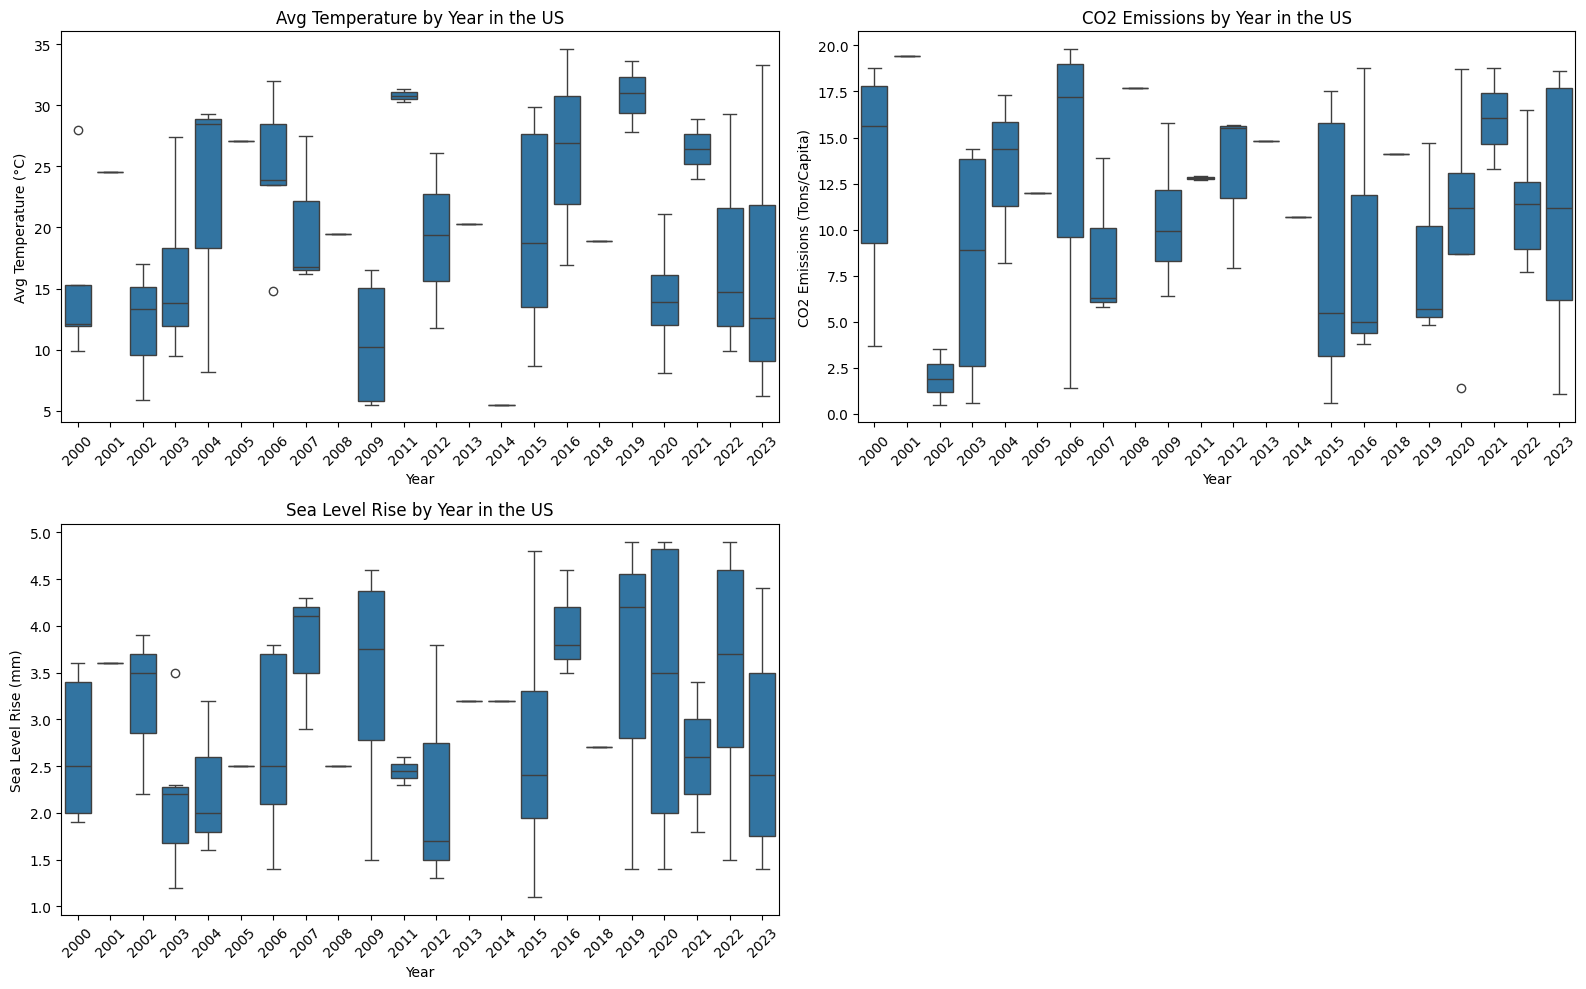

In [26]:
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x='Year', y='Avg Temperature (°C)', data=usa_data)
plt.title('Avg Temperature by Year in the US')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
sns.boxplot(x='Year', y='CO2 Emissions (Tons/Capita)', data=usa_data)
plt.title('CO2 Emissions by Year in the US')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
sns.boxplot(x='Year', y='Sea Level Rise (mm)', data=usa_data)
plt.title('Sea Level Rise by Year in the US')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [28]:
annual_data = usa_data.groupby('Year').mean(numeric_only=True).reset_index()
print(annual_data)

    Year  Avg Temperature (°C)  CO2 Emissions (Tons/Capita)  \
0   2000             15.440000                    13.040000   
1   2001             24.500000                    19.400000   
2   2002             12.066667                     1.966667   
3   2003             15.950000                     8.133333   
4   2004             22.000000                    13.300000   
5   2005             27.100000                    12.000000   
6   2006             24.540000                    13.400000   
7   2007             20.166667                     8.666667   
8   2008             19.500000                    17.700000   
9   2009             10.625000                    10.500000   
10  2011             30.800000                    12.800000   
11  2012             19.100000                    13.033333   
12  2013             20.300000                    14.800000   
13  2014              5.500000                    10.700000   
14  2015             19.942857                     8.78

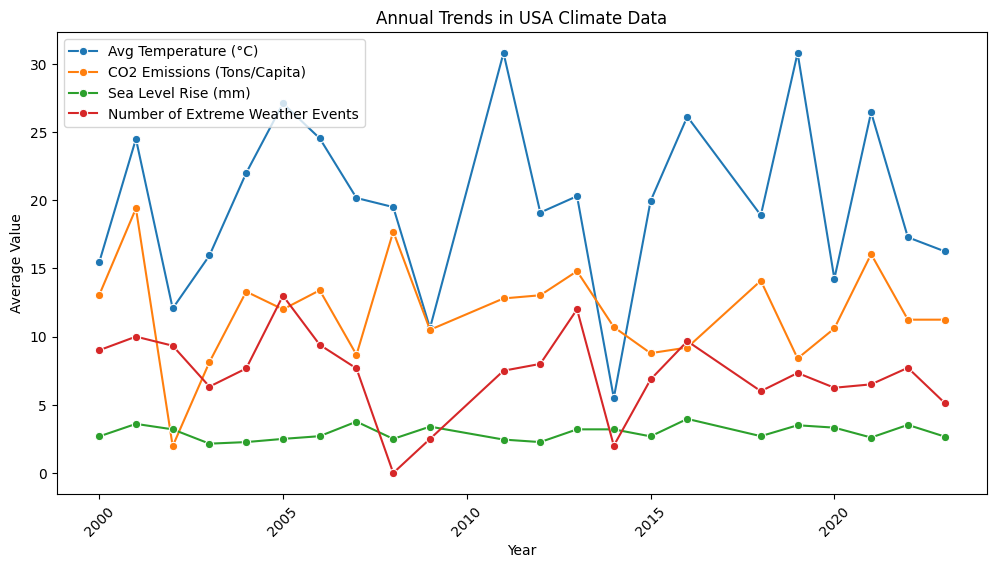

In [31]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=annual_data, x='Year', y='Avg Temperature (°C)', marker='o', label='Avg Temperature (°C)')
sns.lineplot(data=annual_data, x='Year', y='CO2 Emissions (Tons/Capita)', marker='o', label='CO2 Emissions (Tons/Capita)')
sns.lineplot(data=annual_data, x='Year', y='Sea Level Rise (mm)', marker='o', label='Sea Level Rise (mm)')
sns.lineplot(data=annual_data, x='Year', y='Extreme Weather Events', marker='o', label='Number of Extreme Weather Events')
plt.title('Annual Trends in USA Climate Data')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.legend()
plt.xticks(rotation=45)
plt.show()